### Nama : Gulfi Oktariani
### NIM     : 09011381823118

Metode Clustering Menggunakan Algoritma K-Means dan PCA. 

#### 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

#### 2. Load the data.

In [3]:
#loads breast cancer dataset into variable by name cancer. 
cancer = load_breast_cancer() 
# creating dataframe 
df = pd.DataFrame(cancer['data'], columns = cancer['feature_names']) 
# checking head of dataframe 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


##### 3. Define your target and predictors.

In [4]:
X = cancer.data[:, :2]
y = cancer.target
print (X)

[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 ...
 [16.6  28.08]
 [20.6  29.33]
 [ 7.76 24.54]]


In [5]:
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

#### 4.Let’s have a look at our data through a scatter plot.

Text(0, 0.5, 'benign')

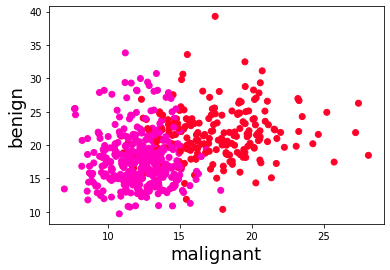

In [6]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow')
plt.xlabel('malignant', fontsize=18)
plt.ylabel('benign', fontsize=18)

#### 5.Now, let’s instantiate and fit our K means cluster model. We are going to use three clusters and a random state of 21.

In [7]:
km = KMeans(n_clusters = 2, n_jobs = 4, random_state=21)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

#### 6. With the following code you can identify the center points of the data.

In [8]:
centers = km.cluster_centers_
print(centers)

[[16.65732751 23.14772926]
 [12.42323824 16.69111765]]


In [9]:
new_labels = km.labels_
print (new_labels)

[1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0
 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 1 0
 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 

#### 7. Now, let’s compare our original data versus our clustered results using the following code.

Text(0.5, 1.0, 'Predicted')

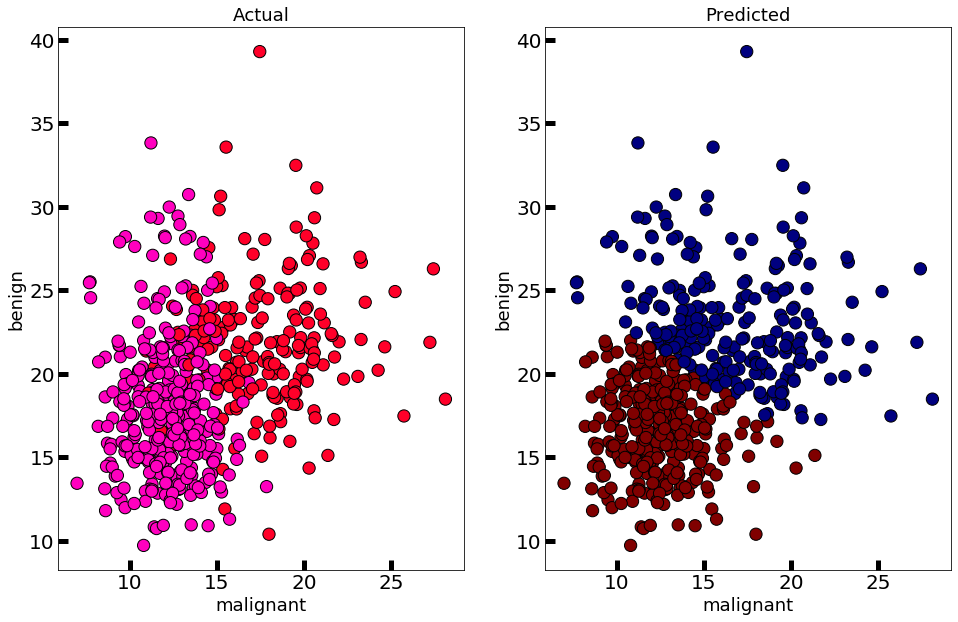

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16,10))
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[1].scatter(X[:, 0], X[:, 1], c=new_labels, cmap='jet',edgecolor='k', s=150)
axes[0].set_xlabel('malignant', fontsize=18)
axes[0].set_ylabel('benign', fontsize=18)
axes[1].set_xlabel('malignant', fontsize=18)
axes[1].set_ylabel('benign', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

##### Building and Fitting the model 

In [11]:
from scipy.spatial.distance import cdist 
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)     
      
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_)   
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

In [12]:
for key,val in mapping1.items(): 
    print(str(key)+' : '+str(val)) 

1 : 4.837992786733862
2 : 3.5083912581891368
3 : 2.985439134183525
4 : 2.61757447148858
5 : 2.4231568669204937
6 : 2.1909591374744606
7 : 2.0198594794270166
8 : 1.9077974325679257
9 : 1.8140853463656479


#### K-Means Elbow Method

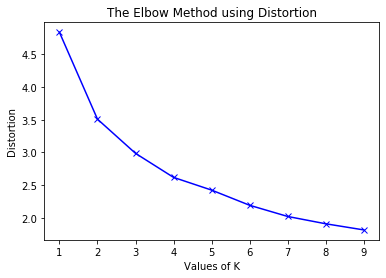

In [13]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

### Principal Component Analysis (PCA)
Mengimplementasikan modul PCA sklearn.

##### Standardizing and applying PCA

In [14]:
scalar = StandardScaler() 
  
# Standardizing 
scalar.fit(df) 
scaled_data = scalar.transform(df) 
  
# applying PCA
pca = PCA(n_components = 3) 
pca.fit(scaled_data) 
x_pca = pca.transform(scaled_data)
x_pca.shape

(569, 3)

#### 2-D results

Text(0, 0.5, 'Second Principal Component')

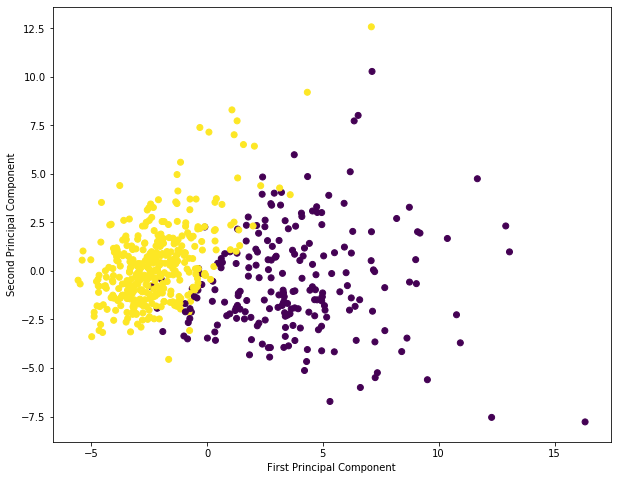

In [16]:
plt.figure(figsize =(10, 8)) 
  
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = cancer['target']) 

# labeling x and y axes 
plt.xlabel('First Principal Component') 
plt.ylabel('Second Principal Component')

Fig. 2-D results of PCA applied upon breast cancer dataset.

##### 3-D results

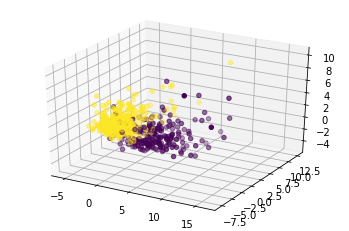

In [17]:
ax = plt.axes(projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=cancer['target'], cmap='viridis', linewidth=1);

Jadi PCA berguna dalam memvisualisasikan dan mengkonfirmasi pengelompokan yang baik, serta elemen yang secara intrinsik berguna dalam menentukan pengelompokan K.